The direct colab link to this notebook is [here](https://colab.research.google.com/github/D3Mlab/ppandas/blob/master/examples/pJoin_mismatches.ipynb).

The datasets used can be found [here](https://github.com/D3Mlab/ppandas/tree/master/tests/testing).

# Installing pre-requisites and ppandas

In [ ]:
# %pip install geopandas==0.12 # required for geovoronoi

In [ ]:
import sys
import os

sys.path.append(os.path.abspath('../ppandas'))
from p_frame import PDataFrame

import pandas as pd

#**Spatial mismatch handling example**
### Reference dataframe uses polygons and secondary dataframe uses points

In [2]:
df1 = pd.read_csv("../tests/data/spatial-ref-region-point.csv")
df1.rename(columns={"Region":"Location"},inplace=True)
df2_point = pd.read_csv("../tests/data/spatial-sec-region-point.csv",usecols=["Point","A"])
df2_point.rename(columns={"Point":"Location"},inplace=True)

pd1 = PDataFrame(["Location"],df1)
pd2_point = PDataFrame(["Location"],df2_point)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Location': 'C', 'A': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Location': 'C', 'A': 'C'}


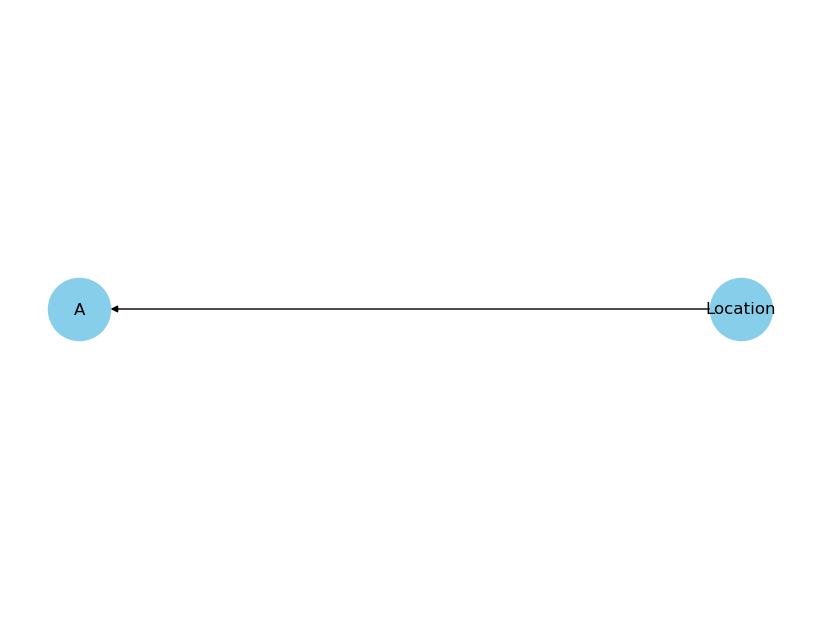

=== CPDs ===
+-----------------------------------------------+----------+
| Location(POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))) | 0.785714 |
+-----------------------------------------------+----------+
| Location(POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))) | 0.214286 |
+-----------------------------------------------+----------+
+----------+-----+
| Location | ... |
+----------+-----+
| A(0)     | ... |
+----------+-----+
| A(1)     | ... |
+----------+-----+


In [3]:
pd1.visualise(show_tables=True)

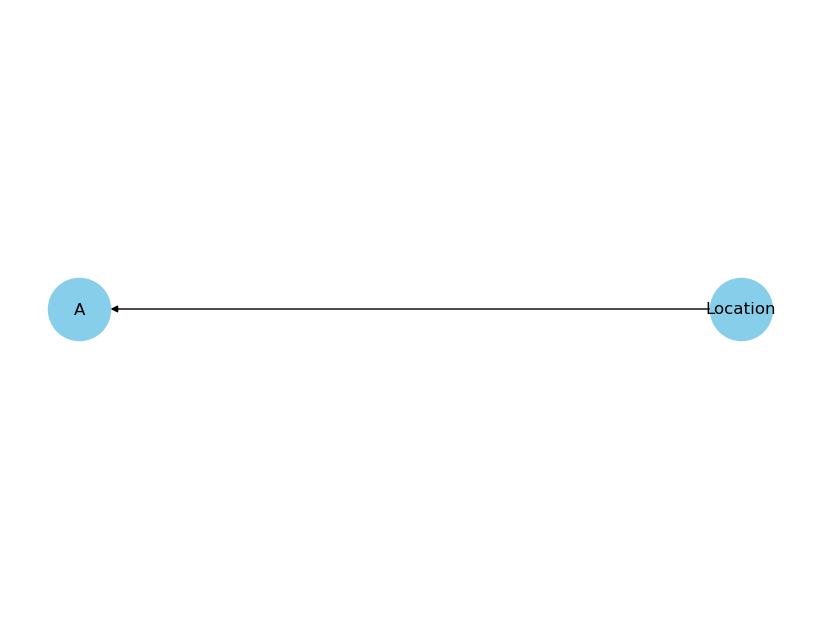

=== CPDs ===
+---------------------------+-----+
| Location(POINT (0.5 0.5)) | 0.5 |
+---------------------------+-----+
| Location(POINT (0.5 1.5)) | 0.5 |
+---------------------------+-----+
+----------+---------------------------+---------------------------+
| Location | Location(POINT (0.5 0.5)) | Location(POINT (0.5 1.5)) |
+----------+---------------------------+---------------------------+
| A(0)     | 0.5952380952380952        | 0.21428571428571427       |
+----------+---------------------------+---------------------------+
| A(1)     | 0.40476190476190477       | 0.7857142857142857        |
+----------+---------------------------+---------------------------+


In [4]:
pd2_point.visualise(show_tables=True)

In [5]:
pd_join = pd1.pjoin(pd2_point, mismatches={"Location":"spatial"})

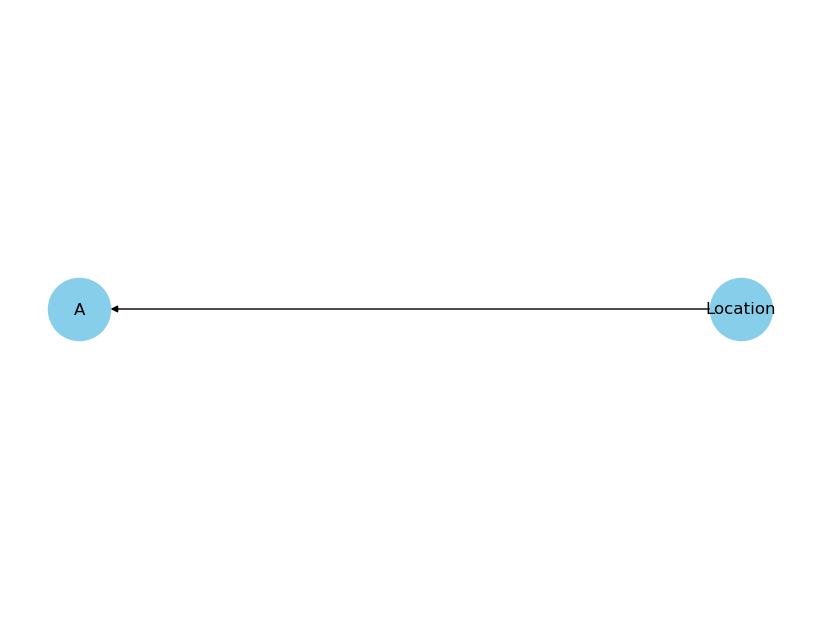

=== CPDs ===
+-----------------------------------------------+----------+
| Location(POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))) | 0.785714 |
+-----------------------------------------------+----------+
| Location(POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))) | 0.214286 |
+-----------------------------------------------+----------+
+----------+-----+
| Location | ... |
+----------+-----+
| A(0)     | ... |
+----------+-----+
| A(1)     | ... |
+----------+-----+


In [6]:
pd_join.visualise(show_tables=True)

In [7]:
queryResult = pd_join.query(['A'],{"Location":"POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))"})
queryResult

,A,Probability(A)
0,0,0.579365
1,1,0.420635


### Reference dataframe uses polygons and secondary dataframe uses two columns  for X,Y coordinates:

In [8]:
#df2_x_y is identical to df2_point, except it has the X,Y coordinates in two columns
df2_x_y = pd.read_csv("../tests/data/spatial-sec-region-point.csv",usecols=["X","Y","A"])
#zip together X and Y to make one Location column
df2_x_y['Location'] = list(zip(df2_x_y.X, df2_x_y.Y))
df2_x_y.drop(columns=["X","Y"],inplace=True)

In [9]:
pd2_x_y = PDataFrame(["Location"],df2_x_y)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'A': 'C', 'Location': 'C'}


In [10]:
pd_join = pd1.pjoin(pd2_x_y, mismatches={"Location":"spatial"})

In [11]:
queryResult = pd_join.query(['A'],{"Location":"POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))"})

In [12]:
queryResult

,A,Probability(A)
0,0,0.579365
1,1,0.420635


### Reference dataframe uses polygons and secondary dataframe uses polygons

In [13]:
df1 = pd.read_csv("../tests/data/spatial-ref-region-region.csv")
df2 = pd.read_csv("../tests/data/spatial-sec-region-region.csv")
pd1 = PDataFrame(["Region"],df1)
pd2 = PDataFrame(["Region"],df2)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Region': 'C', 'A': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Region': 'C', 'B': 'C'}


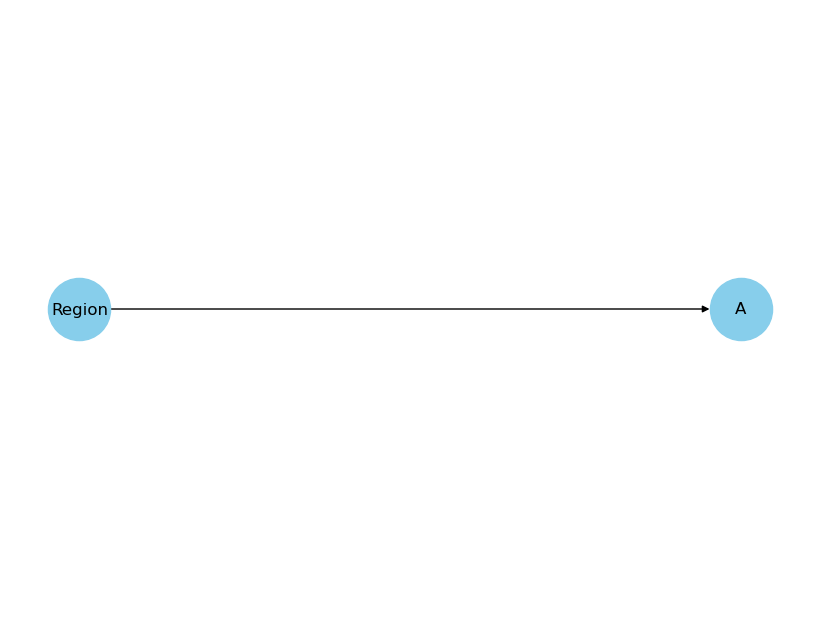

=== CPDs ===
+--------+-----+
| Region | ... |
+--------+-----+
| A(0)   | ... |
+--------+-----+
| A(1)   | ... |
+--------+-----+
+---------------------------------------------------+----------+
| Region(POLYGON ((0 0, 1 0, 1 1.5, 0 1.5, 0 0)))   | 0.785714 |
+---------------------------------------------------+----------+
| Region(POLYGON ((0 1.5, 1 1.5, 1 3, 0 3, 0 1.5))) | 0.214286 |
+---------------------------------------------------+----------+


In [14]:
pd1.visualise(show_tables=True)

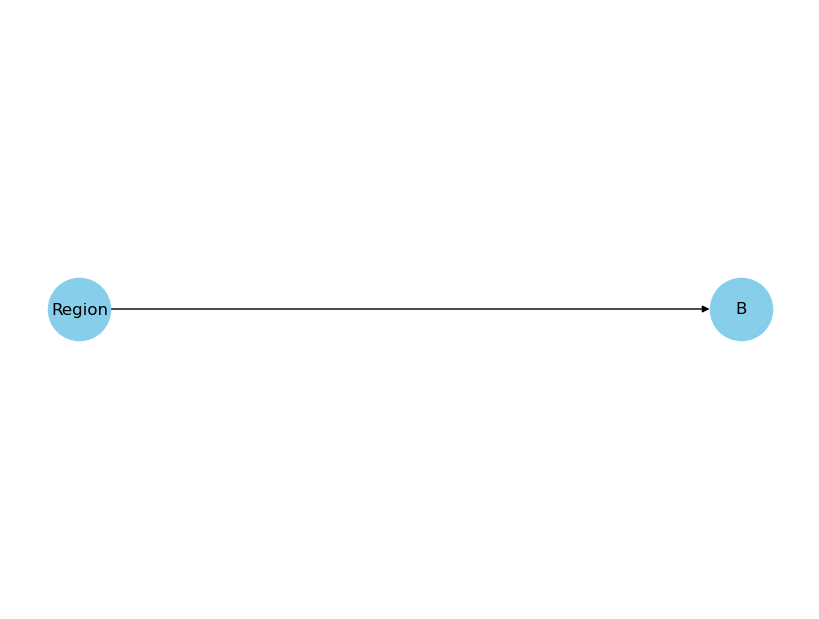

=== CPDs ===
+--------+-----+
| Region | ... |
+--------+-----+
| B(0)   | ... |
+--------+-----+
| B(1)   | ... |
+--------+-----+
+---------------------------------------------+----------+
| Region(POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))) | 0.492063 |
+---------------------------------------------+----------+
| Region(POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))) | 0.301587 |
+---------------------------------------------+----------+
| Region(POLYGON ((0 2, 1 2, 1 3, 0 3, 0 2))) | 0.206349 |
+---------------------------------------------+----------+


In [15]:
pd2.visualise(show_tables=True)

c:\Users\ecorb\OneDrive\Documents\school\Summer 2025\ppandas\ppandas\helper\spatial_helper.py:214: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  res_union = res_union.geometry.explode()


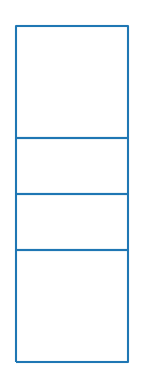

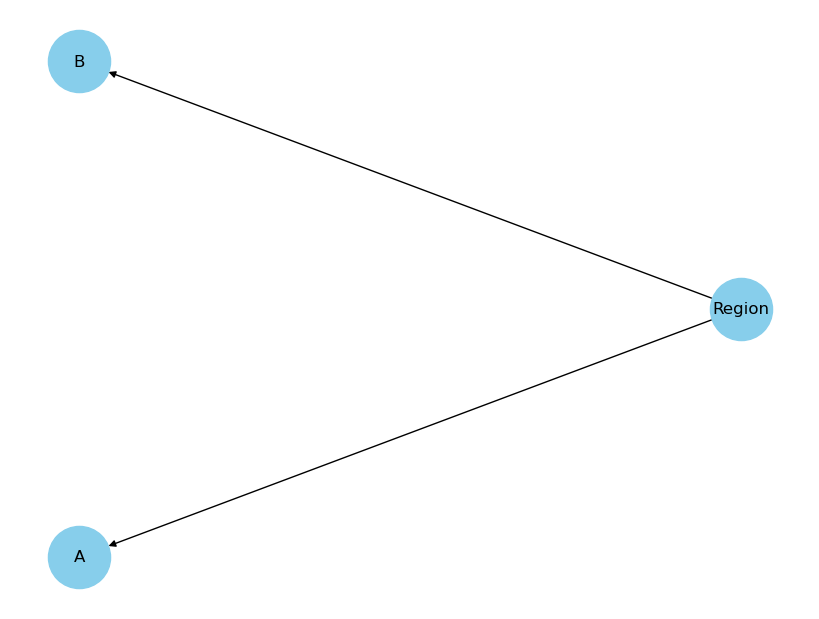

=== CPDs ===
+---------------------------------------------------+-----------+
| Region(POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0)))       | 0.52381   |
+---------------------------------------------------+-----------+
| Region(POLYGON ((1 1, 0 1, 0 1.5, 1 1.5, 1 1)))   | 0.261905  |
+---------------------------------------------------+-----------+
| Region(POLYGON ((0 1.5, 0 2, 1 2, 1 1.5, 0 1.5))) | 0.0714286 |
+---------------------------------------------------+-----------+
| Region(POLYGON ((1 2, 0 2, 0 3, 1 3, 1 2)))       | 0.142857  |
+---------------------------------------------------+-----------+
+--------+-----+
| Region | ... |
+--------+-----+
| B(0)   | ... |
+--------+-----+
| B(1)   | ... |
+--------+-----+
+--------+-----+
| Region | ... |
+--------+-----+
| A(0)   | ... |
+--------+-----+
| A(1)   | ... |
+--------+-----+


In [16]:
pd_join = pd1.pjoin(pd2, mismatches={"Region":"spatial"})
pd_join.visualise(show_tables=True)

In [17]:
queryResult = pd_join.query(['A'],{"Region":"POLYGON ((0 0, 1 0, 1 1.5, 0 1.5, 0 0))"})

In [18]:
queryResult

,A,Probability(A)
0,0,0.378788
1,1,0.621212


#**Numerical mismatch handling example**

Load data

In [19]:
df1 = pd.read_csv("../tests/data/numerical-1.csv")
df2 = pd.read_csv("../tests/data/numerical-2.csv")

pd1 = PDataFrame(["Gender","Age"],df1)
pd2 = PDataFrame(["Gender","Age"],df2)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'C', 'Gender': 'C', 'Gun Control': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'C', 'Gender': 'C', 'Gun Control': 'C'}


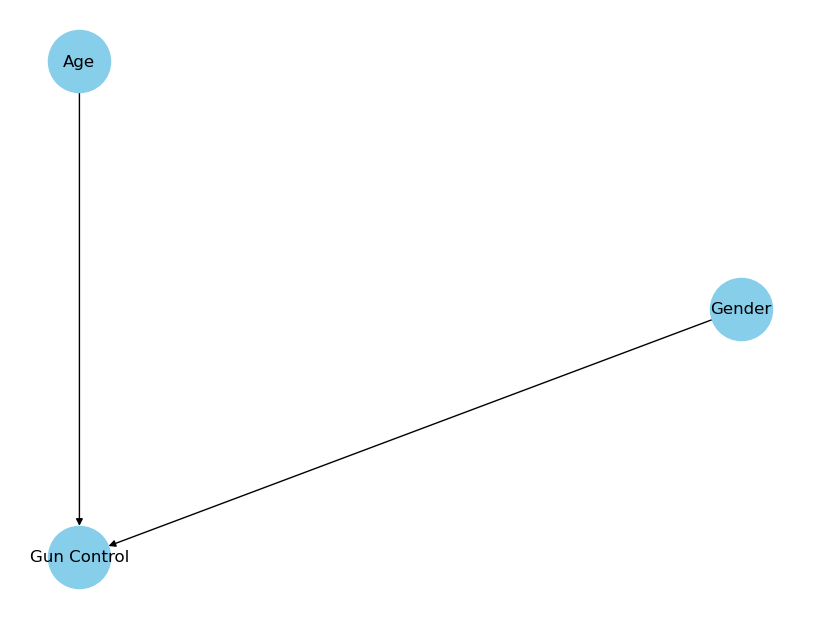

=== CPDs ===
+----------------+-----+
| Gender(female) | 0.5 |
+----------------+-----+
| Gender(male)   | 0.5 |
+----------------+-----+
+--------------+----------+
| Age([20,40)) | 0.333333 |
+--------------+----------+
| Age([40,60)) | 0.333333 |
+--------------+----------+
| Age([60,80)) | 0.333333 |
+--------------+----------+
+----------------------+-----+----------------+--------------+
| Age                  | ... | Age([60,80))   | Age([60,80)) |
+----------------------+-----+----------------+--------------+
| Gender               | ... | Gender(female) | Gender(male) |
+----------------------+-----+----------------+--------------+
| Gun Control(Against) | ... | 0.5            | 0.5          |
+----------------------+-----+----------------+--------------+
| Gun Control(For)     | ... | 0.5            | 0.5          |
+----------------------+-----+----------------+--------------+


In [20]:
pd1.visualise(show_tables=True)

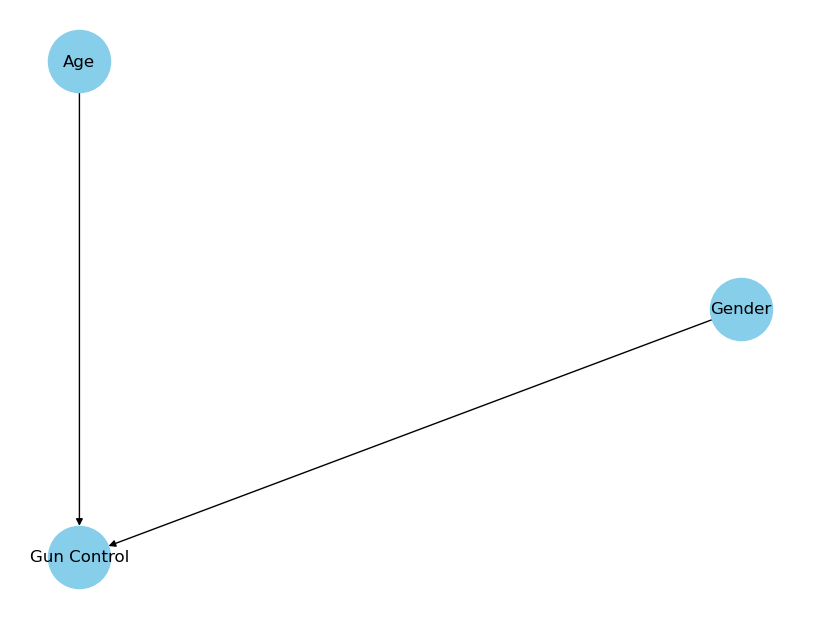

=== CPDs ===
+----------------+-----+
| Gender(female) | 0.5 |
+----------------+-----+
| Gender(male)   | 0.5 |
+----------------+-----+
+--------------+----------+
| Age([20,50)) | 0.334711 |
+--------------+----------+
| Age([50,80)) | 0.665289 |
+--------------+----------+
+----------------------+-----+----------------+--------------+
| Age                  | ... | Age([50,80))   | Age([50,80)) |
+----------------------+-----+----------------+--------------+
| Gender               | ... | Gender(female) | Gender(male) |
+----------------------+-----+----------------+--------------+
| Gun Control(Against) | ... | 0.5            | 0.5          |
+----------------------+-----+----------------+--------------+
| Gun Control(For)     | ... | 0.5            | 0.5          |
+----------------------+-----+----------------+--------------+


In [21]:
pd2.visualise(show_tables=True)

keyword argument mismatch takes in a dictionary with mismtach column names as keys and the type of mismatches as values

In [22]:
pd_join = pd1.pjoin(pd2,mismatches={"Age":'numerical'})

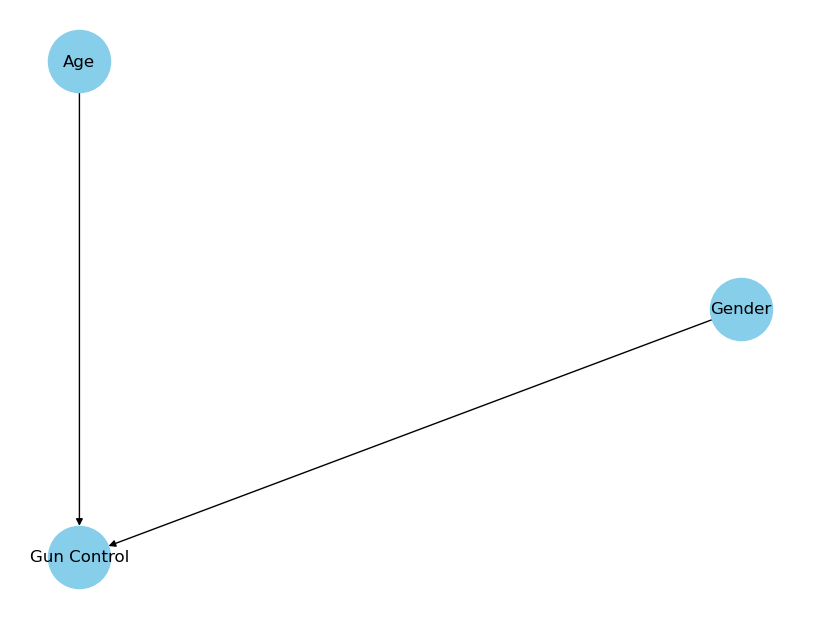

=== CPDs ===
+----------------+-----+
| Gender(female) | 0.5 |
+----------------+-----+
| Gender(male)   | 0.5 |
+----------------+-----+
+--------------+----------+
| Age([20,40)) | 0.333333 |
+--------------+----------+
| Age([40,50)) | 0.166667 |
+--------------+----------+
| Age([50,60)) | 0.166667 |
+--------------+----------+
| Age([60,80)) | 0.333333 |
+--------------+----------+
+----------------------+-----+----------------+--------------+
| Age                  | ... | Age([60,80))   | Age([60,80)) |
+----------------------+-----+----------------+--------------+
| Gender               | ... | Gender(female) | Gender(male) |
+----------------------+-----+----------------+--------------+
| Gun Control(Against) | ... | 0.5            | 0.5          |
+----------------------+-----+----------------+--------------+
| Gun Control(For)     | ... | 0.5            | 0.5          |
+----------------------+-----+----------------+--------------+


In [23]:
pd_join.visualise(show_tables=True)

In [24]:
queryResult = pd_join.query(['Gun Control'],{"Gender":'female',"Age":'[40,60)'})

In [25]:
queryResult

,Gun Control,Probability(Gun Control)
0,Against,0.5
1,For,0.5


In [26]:
pd_join2 = pd2.pjoin(pd1, mismatches={'Age':'numerical'})

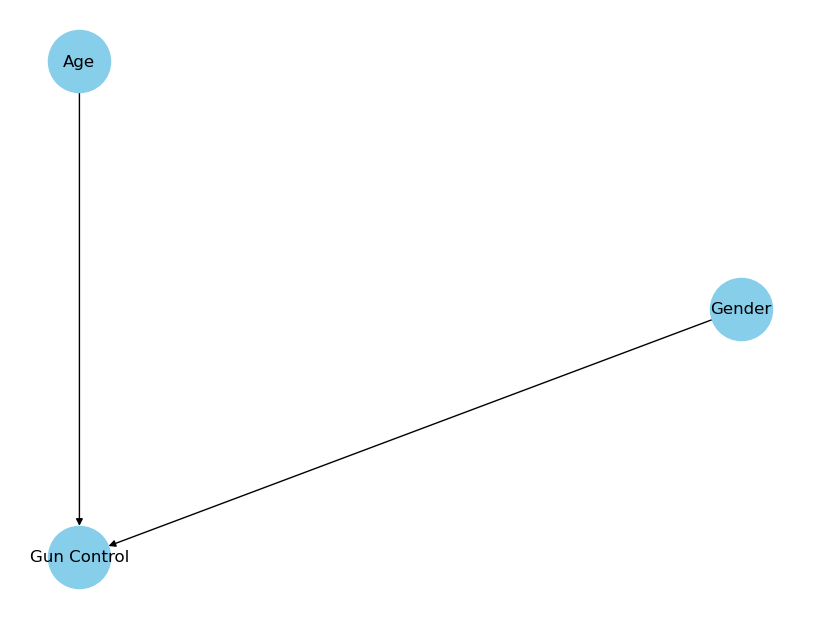

=== CPDs ===
+----------------+-----+
| Gender(female) | 0.5 |
+----------------+-----+
| Gender(male)   | 0.5 |
+----------------+-----+
+--------------+----------+
| Age([20,40)) | 0.22314  |
+--------------+----------+
| Age([40,50)) | 0.11157  |
+--------------+----------+
| Age([50,60)) | 0.221763 |
+--------------+----------+
| Age([60,80)) | 0.443526 |
+--------------+----------+
+----------------------+-----+----------------+--------------+
| Age                  | ... | Age([60,80))   | Age([60,80)) |
+----------------------+-----+----------------+--------------+
| Gender               | ... | Gender(female) | Gender(male) |
+----------------------+-----+----------------+--------------+
| Gun Control(Against) | ... | 0.5            | 0.5          |
+----------------------+-----+----------------+--------------+
| Gun Control(For)     | ... | 0.5            | 0.5          |
+----------------------+-----+----------------+--------------+


In [27]:
pd_join2.visualise(show_tables=True)

#**Categorical mismatch handling example**

In [28]:
pd_join3 = pd1.pjoin(pd2, mismatches={'Age':'categorical'})

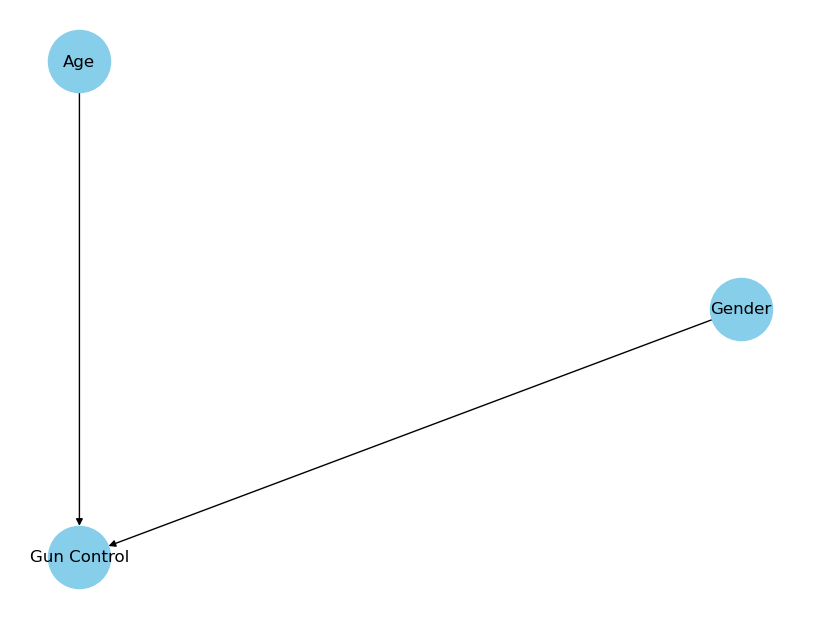

=== CPDs ===
+----------------+-----+
| Gender(female) | 0.5 |
+----------------+-----+
| Gender(male)   | 0.5 |
+----------------+-----+
+----------------------+----------+
| Age([20,40),[20,50)) | 0.166667 |
+----------------------+----------+
| Age([20,40),[50,80)) | 0.166667 |
+----------------------+----------+
| Age([40,60),[20,50)) | 0.166667 |
+----------------------+----------+
| Age([40,60),[50,80)) | 0.166667 |
+----------------------+----------+
| Age([60,80),[20,50)) | 0.166667 |
+----------------------+----------+
| Age([60,80),[50,80)) | 0.166667 |
+----------------------+----------+
+----------------------+-----+----------------------+
| Age                  | ... | Age([60,80),[50,80)) |
+----------------------+-----+----------------------+
| Gender               | ... | Gender(male)         |
+----------------------+-----+----------------------+
| Gun Control(Against) | ... | 0.5                  |
+----------------------+-----+----------------------+
| Gun Control(Fo

In [29]:
pd_join3.visualise(show_tables=True)